# Lab 4
# Logistic Regression

### Submitted to: Prof. Sweetlin Hemlatha
### Submitted by: Prateek Singh (15BCE1091)

In [4]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [5]:
white_wine = pd.read_csv('../Dataset/winequality-white.csv', sep=';')
sn.set(style='ticks', color_codes=True, font_scale=1)

In [6]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Working with white wine dataset first, in between the assignment I realized there was no need for regression analysis.
As we arealy have a dataset, we just need to apply the sklearn's logistic regression with different function.




Dividing the dataset into training and testing classes.




In [7]:
print('Rows in white wine dataset: ', len(white_wine.axes[0]))
# print('Rows in red wine dataset: ', len(red_wine.axes[0]))


Rows in white wine dataset:  4898


Let's use the white wine dataset and we will split the dataset into training and testing

In [8]:
# Doing some analysis over the dataset
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
classes = sorted(white_wine.quality.unique())

print('Number of data points for class: \n')

for cls in classes:
    num_samples = len(white_wine.loc[white_wine.quality == cls])
    print(cls, " :", num_samples)


Number of data points for class: 

3  : 20
4  : 163
5  : 1457
6  : 2198
7  : 880
8  : 175
9  : 5


Each data point has 11 features in total, however, we just have around 4400 training example. <br>


Moreover the dataset is very skewed with very few examples in some classes and the major concentration of examples in the other classes. <br>


We either need to reduce the number of features that we're dealing with, by either trying to find the importance of each feature (using decision trees) or dimensionality reduction, or we need to increase the number of examples such that the dataset is less biased towards some of the classes.

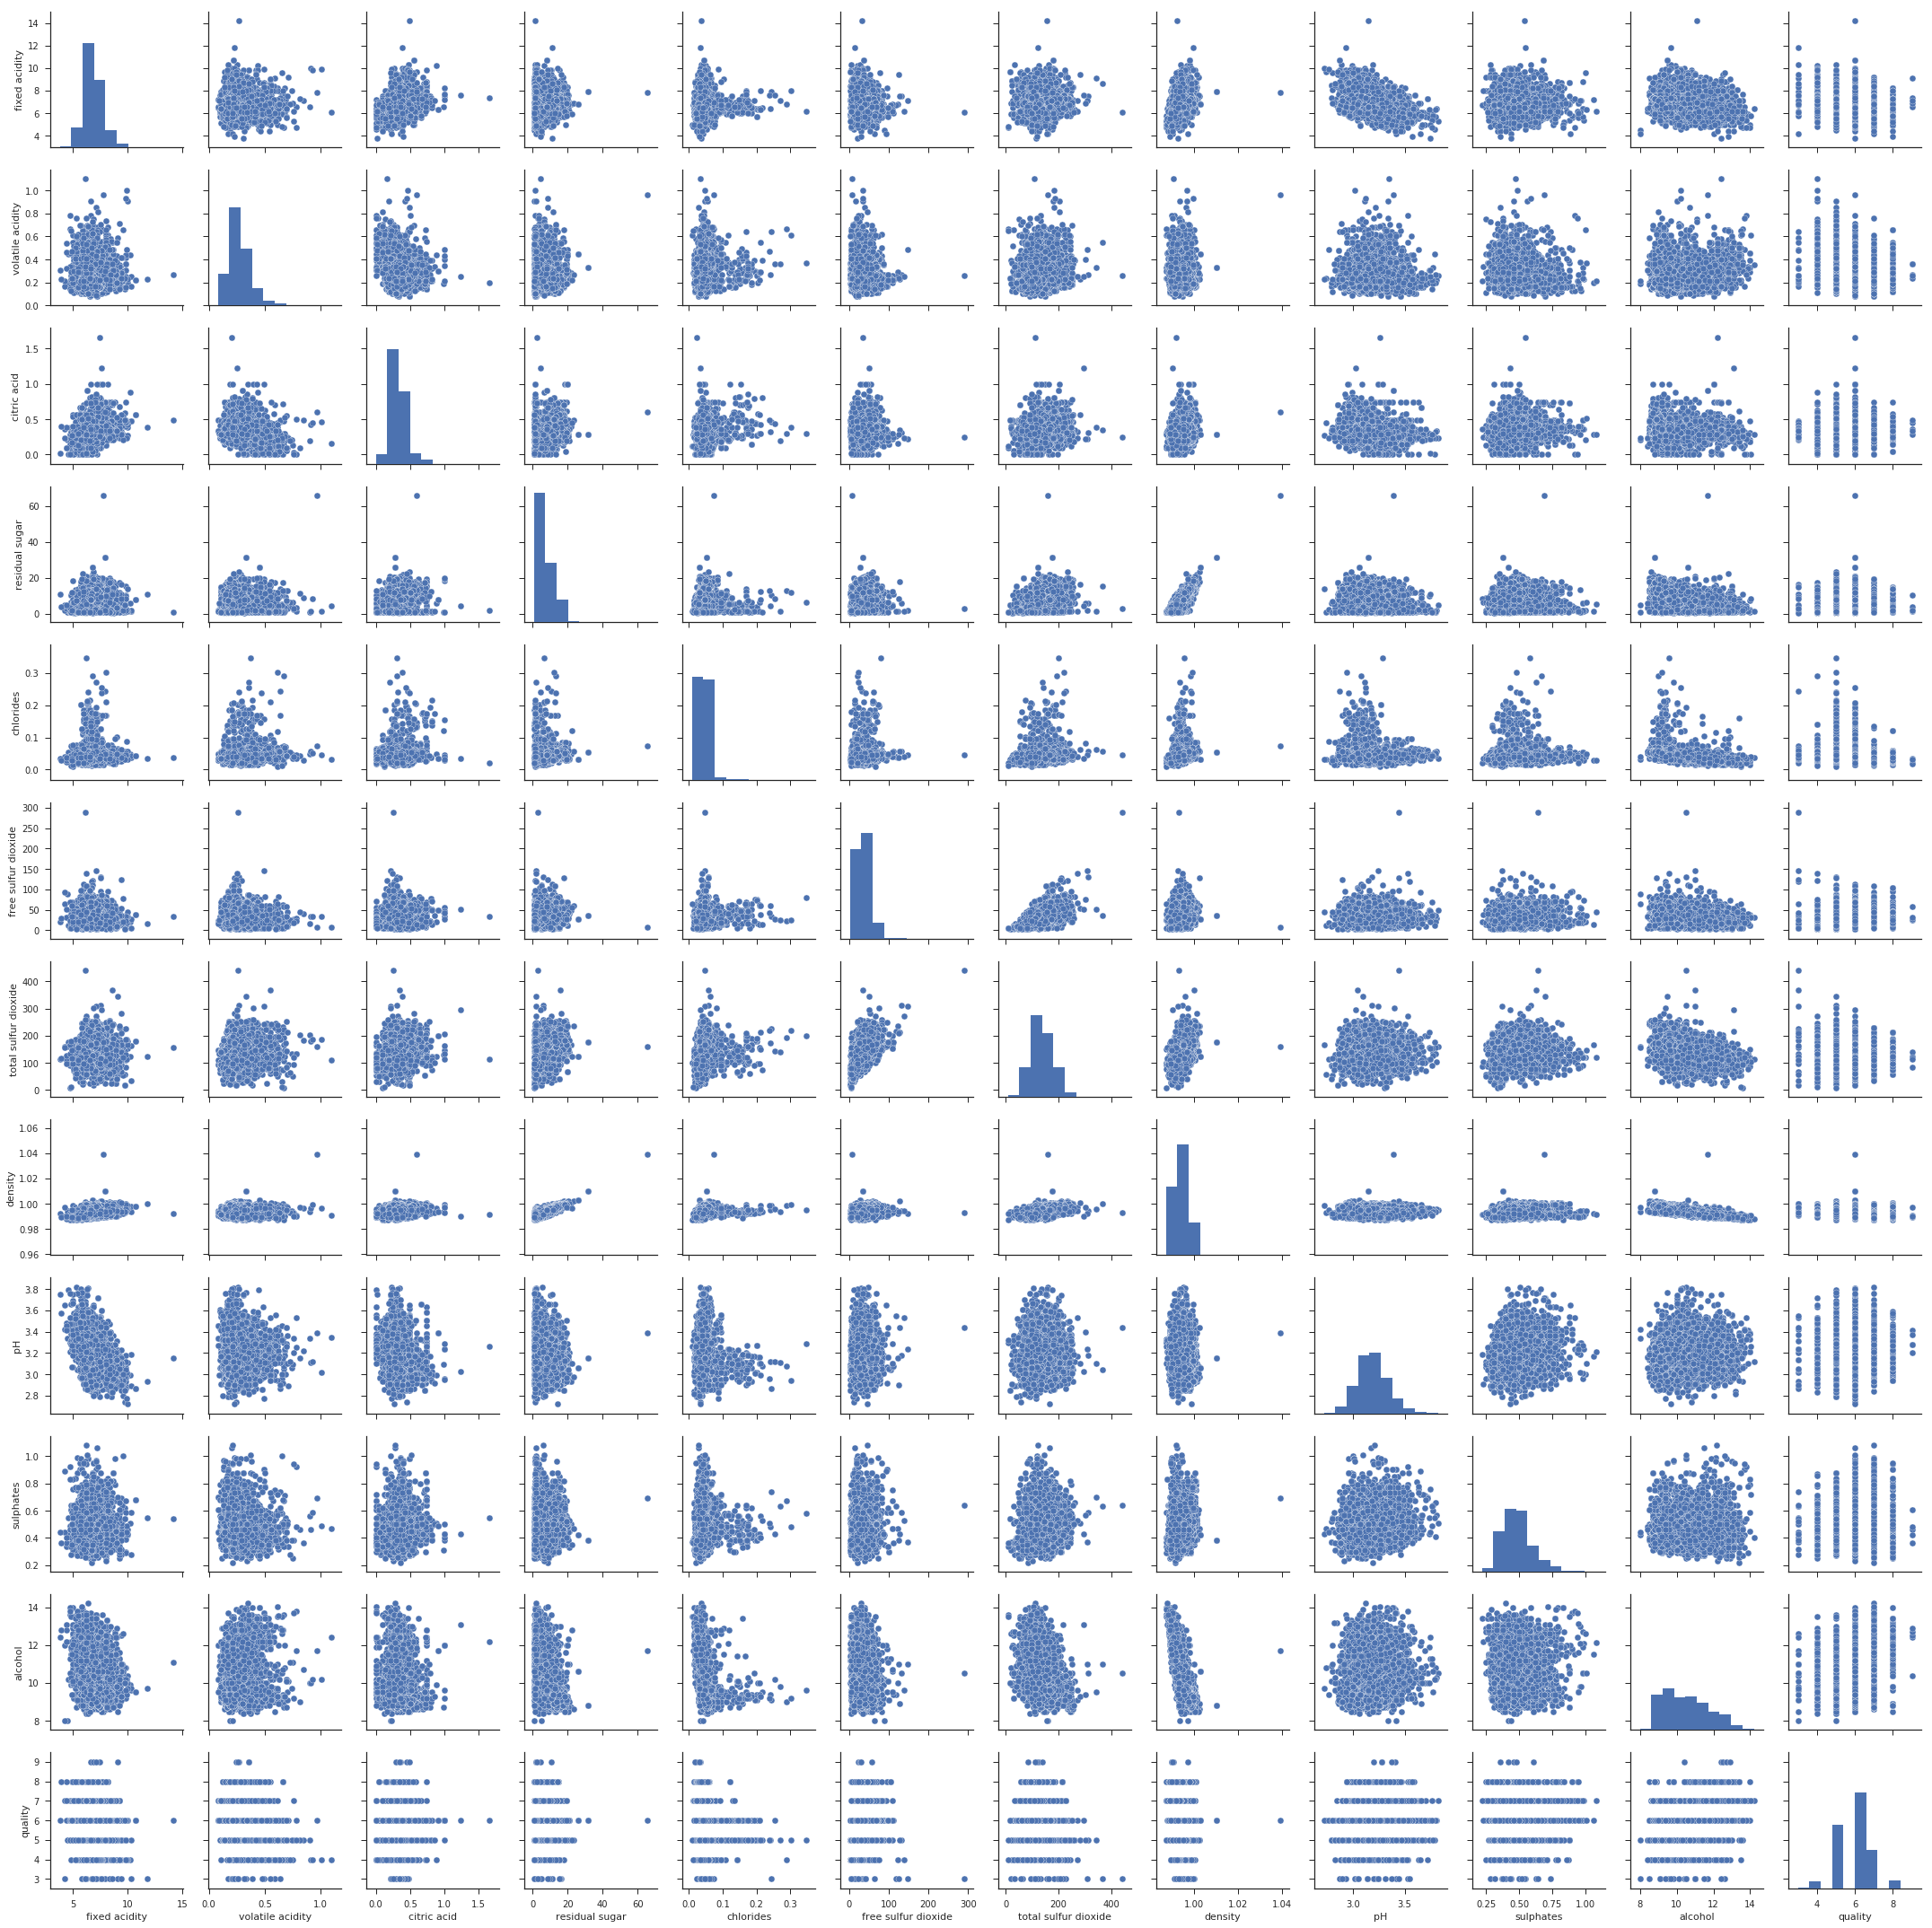

In [10]:
sn.pairplot(white_wine.dropna(), size=2.5)

Feature rankings
1. feature 10 (0.130143) (1.000000)
2. feature 1 (0.100346) (0.180734)
3. feature 7 (0.092182) (0.701958)
4. feature 5 (0.089962) (0.522192)
5. feature 6 (0.087584) (0.609776)
6. feature 8 (0.085251) (0.787209)
7. feature 3 (0.084598) (0.349213)
8. feature 2 (0.083881) (0.264614)
9. feature 4 (0.083017) (0.432230)
10. feature 9 (0.082648) (0.869857)
11. feature 0 (0.080387) (0.080387)


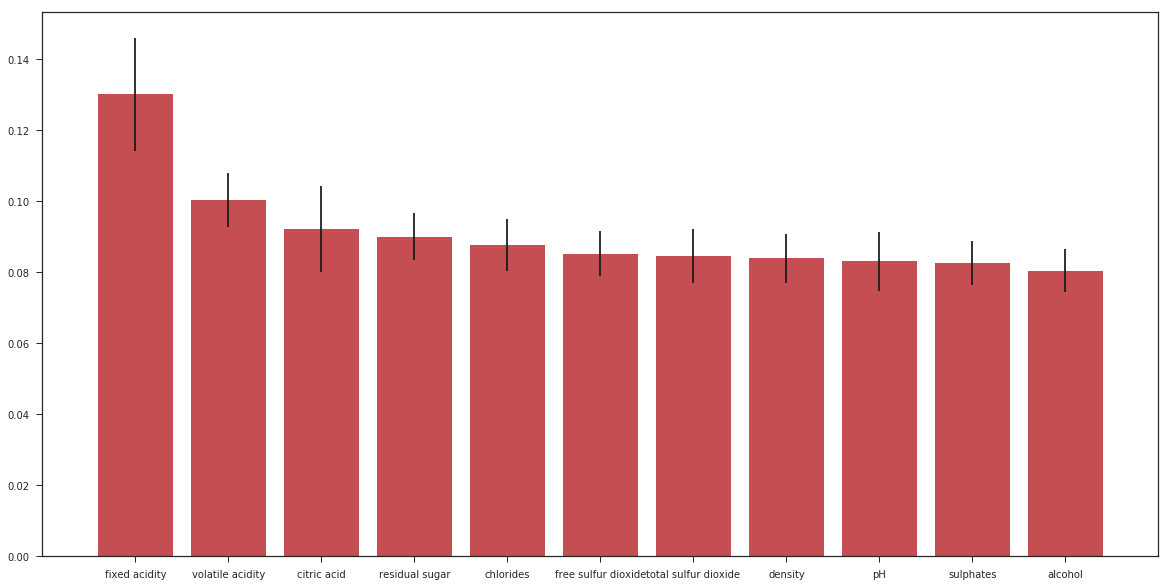

In [11]:
data, labels = white_wine.iloc[:, :11], white_wine.iloc[:, 11]

forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(data, labels)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
cumulative_imp = np.cumsum(importances)

print('Feature rankings')
    
for f in range(data.shape[1]):
    print("%d. feature %d (%f) (%f)" % (f + 1, indices[f], importances[indices[f]], cumulative_imp[indices[f]]))
    
plt.figure(figsize=(20, 10))
plt.bar(range(data.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(data.shape[1]), list(white_wine.columns.values[:11]))
plt.xlim([-1, data.shape[1]])
plt.show()

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(white_wine.iloc[:, :11], 
                                                     white_wine.iloc[:, 11], 
                                                     test_size=0.1, 
                                                     random_state=42)
print("Size of training set: ", len(X_train.axes[0]))
print("Size of test set: ", len(X_test.axes[0]))

Size of training set:  4408
Size of test set:  490


In [13]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1052,7.6,0.29,0.42,1.3,0.035,18.0,86.0,0.99080,2.99,0.39,11.3
3606,6.4,0.38,0.24,7.2,0.047,41.0,151.0,0.99604,3.11,0.60,9.2
1610,7.5,0.32,0.49,1.7,0.031,44.0,109.0,0.99060,3.07,0.46,12.5
621,6.5,0.26,0.43,8.9,0.083,50.0,171.0,0.99650,2.85,0.50,9.0
4750,6.0,0.14,0.37,1.2,0.032,63.0,148.0,0.99185,3.32,0.44,11.2


In [14]:
# Normalizing the features in Training and testing data.
X_tr, X_tes = X_train.values, X_test.values
min_max_scaler = preprocessing.MinMaxScaler()
#X_tr_scaled = min_max_scaler.fit_transform(X_tr)
#X_tes_scaled = min_max_scaler.fit_transform(X_tes)
X_train = pd.DataFrame(min_max_scaler.fit_transform(X_tr), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(min_max_scaler.fit_transform(X_tes), index=X_test.index, columns=X_test.columns)

X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1052,0.4750,0.205882,0.253012,0.010736,0.077151,0.052448,0.178654,0.071139,0.245455,0.197674,0.532258
3606,0.3250,0.294118,0.144578,0.101227,0.112760,0.132867,0.329466,0.172161,0.354545,0.441860,0.193548
1610,0.4625,0.235294,0.295181,0.016871,0.065282,0.143357,0.232019,0.067284,0.318182,0.279070,0.725806
621,0.3375,0.176471,0.259036,0.127301,0.219585,0.164336,0.375870,0.181029,0.118182,0.325581,0.161290
4750,0.2750,0.058824,0.222892,0.009202,0.068249,0.209790,0.322506,0.091382,0.545455,0.255814,0.516129


Feature rankings
1. feature 10 (0.123645)
2. feature 1 (0.100660)
3. feature 7 (0.097706)
4. feature 5 (0.090431)
5. feature 4 (0.090032)
6. feature 6 (0.086664)
7. feature 8 (0.086057)
8. feature 9 (0.083790)
9. feature 0 (0.080790)
10. feature 2 (0.080779)
11. feature 3 (0.079445)


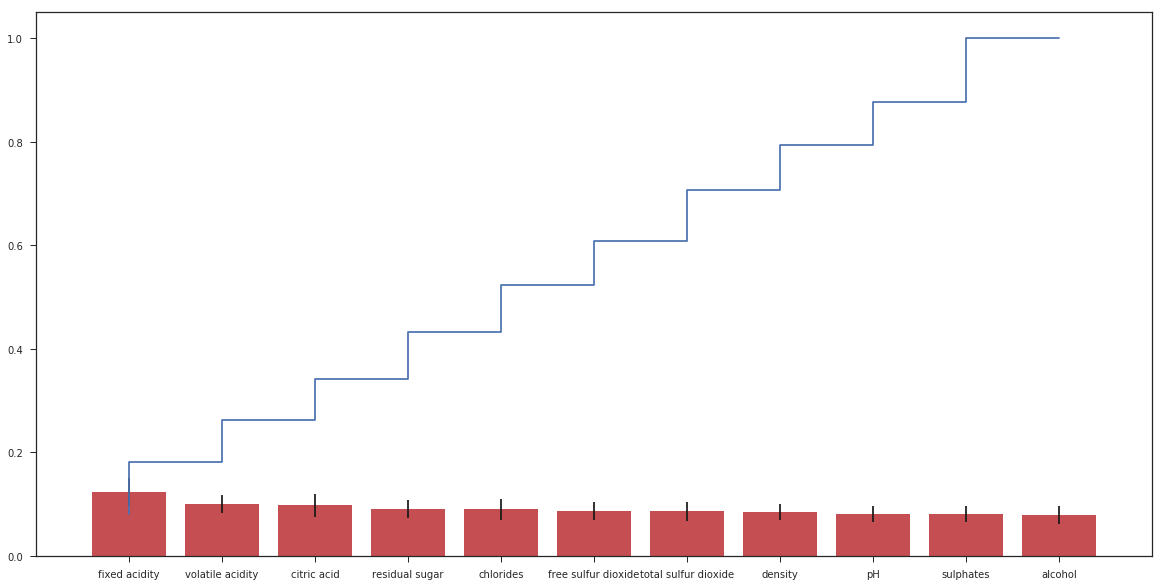

In [15]:
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X_test, Y_test)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
cum_imp = np.cumsum(importances)
indices = np.argsort(importances)[::-1]

print('Feature rankings')
    
for f in range(data.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
plt.figure(figsize=(20, 10))
plt.bar(range(data.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.step(range(data.shape[1]), cum_imp, 'b')
plt.xticks(range(data.shape[1]), list(white_wine.columns.values[:11]))
plt.xlim([-1, data.shape[1]])
plt.show()

From the above graph it is evident that each of the feature contributes almost eqaully to the information represented by the dataset and thus omitting any of the features from the logistic regression isn't a wise choice, Hence we will keep all the features in the dataset with us.

In [16]:
model_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=100000, multi_class='multinomial')
model_l1.fit(X_train, Y_train)

print("Train Score: ", model_l1.score(X_train, Y_train))
print("Test Score: ", model_l1.score(X_test, Y_test), '\n')

Y_pred = model_l1.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


Train Score:  0.5410617059891107
Test Score:  0.49183673469387756 

[[  0   0   0   3   0   0]
 [  0   0  11   7   0   0]
 [  0   0  34 108   1   1]
 [  0   0  14 188  13   0]
 [  0   0   3  72  18   1]
 [  0   0   0  11   4   1]]


In [17]:
model_l2 = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=10000, multi_class='multinomial')
model_l2.fit(X_train, Y_train)

print("Train Score: ", model_l2.score(X_train, Y_train))
print("Test Score: ", model_l2.score(X_test, Y_test), '\n')

Y_pred = model_l2.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)


Train Score:  0.5394736842105263
Test Score:  0.4959183673469388 

[[  0   0   0   3   0   0]
 [  0   0  10   8   0   0]
 [  0   0  31 113   0   0]
 [  0   0  13 193   9   0]
 [  0   0   2  73  19   0]
 [  0   0   0  11   5   0]]


In [18]:
def plot_decision_surface(X, y, classifier, test_idx=None, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v', '+', '.')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'lightblue', 'lightgreen')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    plt.figure(figsize=(15, 15))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.xlabel('fixed acidity')
    plt.ylabel('volatile acidity')
    
    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)
        if test_idx:
            X_test, y_test = X[test_idx, :], y[test_idx]
            plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')

In [19]:
model_l2 = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=10000, multi_class='multinomial')
model_l2.fit(X_train.iloc[:, [1, 10]], Y_train)

print("Train Score: ", model_l2.score(X_train.iloc[:,[1, 10]], Y_train))
print("Test Score: ", model_l2.score(X_test.iloc[:, [1, 10]], Y_test), '\n')

Y_pred = model_l2.predict(X_test.iloc[:, [1, 10]])
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

Train Score:  0.5249546279491834
Test Score:  0.5061224489795918 

[[  0   0   2   1   0   0]
 [  0   1  12   5   0   0]
 [  0   0  90  53   1   0]
 [  0   0  64 141  10   0]
 [  0   0  15  63  16   0]
 [  0   0   1  11   4   0]]


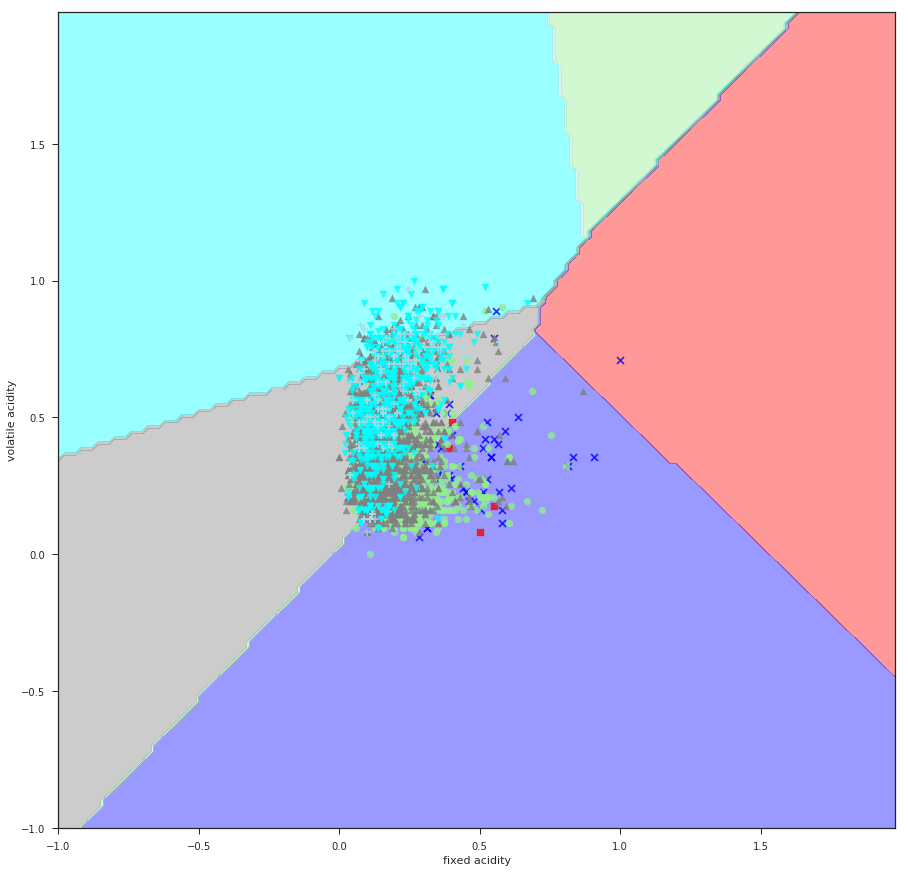

In [20]:
a = X_train.iloc[:, [1, 10]].values
plot_decision_surface(X=a, y = np.array(Y_train.values), classifier=model_l2)